In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics

In [39]:
start = time.time()
diabets = pd.read_csv('datasets/pima-indians-diabetes.csv' ).dropna(how = 'all')
print(time.time() - start)
diabets.dtypes

0.00559186935425


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [40]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
diabets.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [42]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [43]:
diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


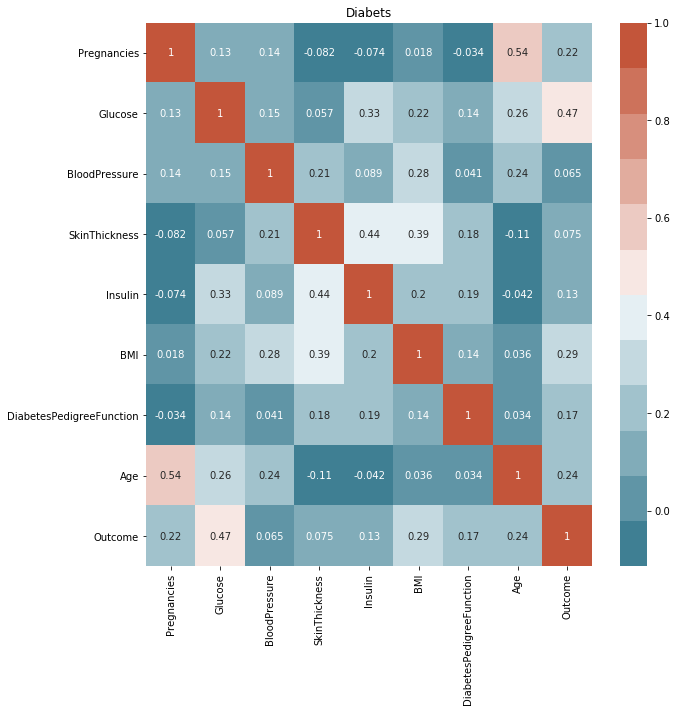

In [44]:
plt.figure(figsize=(10, 10))
df_corr = diabets.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diabets")
plt.show()

In [57]:
X = diabets.drop(['Outcome'], axis = 1 ).values
y = diabets['Outcome'].values

In [63]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X , y  , test_size = 0.2 , random_state = 42)

In [182]:
def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 23)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors= k)
        knn.fit(X_train , y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    plt.figure(figsize=(10, 8))
    sns.set_style("whitegrid")
    plt.title('k in kNN analysis')
    plt.plot( neighbors , test_accuracy , label = 'Testing Accuracy')
    plt.plot(neighbors,train_accuracy ,label = 'Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with this k is {0:.2f} %'.format(max(test_accuracy) * 100), xy=(np.argmax(test_accuracy) + 1 , max(test_accuracy)), xytext=(4 , 0.973),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

In [211]:
def LogisticRegression_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_LG
    global LG_pipeline
    global y_prob_LG
    
    steps = [('impute' , SimpleImputer(missing_values = 0, strategy='mean')),
             ('scaler', StandardScaler()),
             ('LogisticRegression', LogisticRegression(random_state = 0))]
    
    LG_pipeline = Pipeline(steps)

    
    LG_pipeline.fit(X_train , y_train)
    
    y_pred_LG = LG_pipeline.predict(X_test)
    
    y_prob_LG = LG_pipeline.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(LG_pipeline.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_LG))

In [183]:
def kNN_algorithm(X_train , y_train , X_test , y_test , k):
    
    global y_pred_kNN
    global kNN_pipeline
    
    steps = [('impute' , SimpleImputer(missing_values = 0, strategy='mean')),
             ('sclaer', StandardScaler()),
             ('kNN', KNeighborsClassifier(n_neighbors = k))]
    
    kNN_pipeline = Pipeline(steps)
    
    kNN_pipeline.fit(X_train , y_train)
    
    y_pred_kNN = kNN_pipeline.predict(X_test)
    
    print(classification_report(y_test , y_pred_kNN))
    print('kNN algorithm acuracy is : {0:.2f} %'.format(kNN_pipeline.score(X_test , y_test) * 100))

In [184]:
def plot_confusion_matrix(cf_matrix , y_test , model_type , cf_size):
    if cf_size == '2x2':
        group_names = ['True Negative','False Positive','False Negative','True Positive']
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        labels = ['{}\n{}'.format(v1 ,v2) for v1, v2 in zip(group_names,group_counts)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix,
            annot = labels,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='',
            linewidths=1.5,
            vmin=0,
            vmax=len(y_test),
        )
        plt.title(model_type)
        plt.show()
    else:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix / np.sum(cf_matrix) * 100,
            annot = True,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='.2f',
            linewidths=1.5,
            vmin=0,
            vmax=100,
        )
        plt.title(model_type)
        plt.show()

In [189]:
def plot_AUC_ROC_kNN(X_test , y_test , pipeline):
    
    probs = pipeline.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {0:.2f}'.format(roc_auc_score(y_test, preds)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('ROC AUC score is ' + '{0:.2f}'.format(roc_auc_score(y_test, preds)))

In [215]:
def SVM_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_SVM
    global SVM_pipeline
    global y_prob_SVM
    
    steps = [('impute' , SimpleImputer(missing_values = 0, strategy='mean')),
             ('scaler', StandardScaler()),
             ('SVM', SVC(probability=True))]
    
    SVM_pipeline = Pipeline(steps)
    
    parameters = {'SVM__C':[1, 10, 100 ],
                  'SVM__gamma':[0.1, 0.01]}
    
    cv = GridSearchCV(SVM_pipeline , cv = 3 , param_grid = parameters)
    
    cv.fit(X_train , y_train)
    
    y_pred_SVM = cv.predict(X_test)
    
    y_prob_SVM = cv.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(cv.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_SVM))
    print("Tuned Model Parameters: {}".format(cv.best_params_))

In [201]:
def plot_AUC_ROC_SVM_and_LG(X_test , y_test , y_prob_SVM):
    
    probs = y_prob_SVM
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {0:.2f}'.format(roc_auc_score(y_test, preds)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('ROC AUC score is ' + '{0:.2f}'.format(roc_auc_score(y_test, preds)))

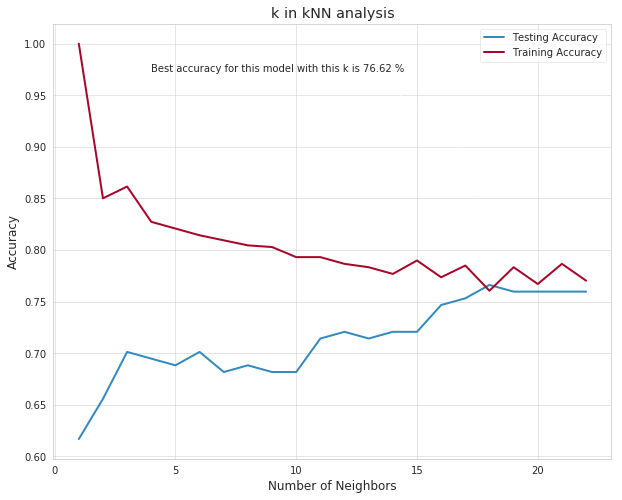

In [185]:
calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test)

In [186]:
kNN_algorithm(X_train , y_train , X_test , y_test , 18)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

   micro avg       0.76      0.76      0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154

kNN algorithm acuracy is : 75.97 %


In [187]:
cf_matrix_knn = confusion_matrix(y_test, y_pred_kNN)

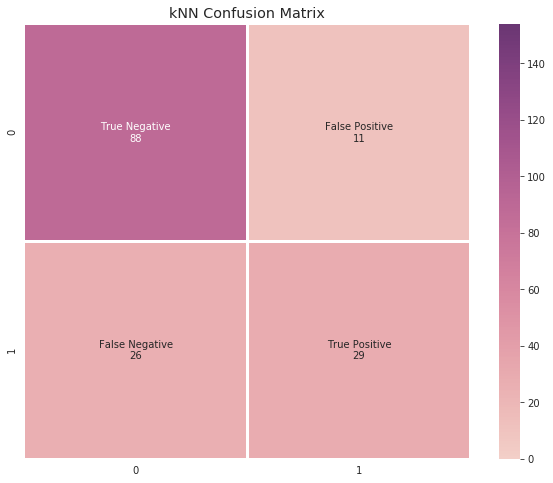

In [188]:
plot_confusion_matrix(cf_matrix_knn , y_test , 'kNN Confusion Matrix' , '2x2')

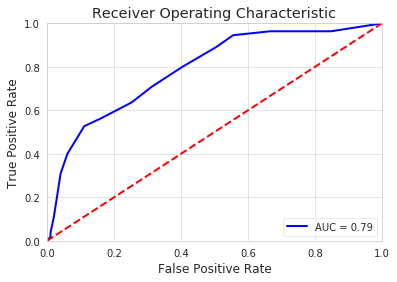

ROC AUC score is 0.79


In [192]:
plot_AUC_ROC_kNN(X_test , y_test , kNN_pipeline)

In [216]:
SVM_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 77.27 %
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

   micro avg       0.77      0.77      0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}


In [217]:
cf_matrix_svm = confusion_matrix(y_test, y_pred_SVM)

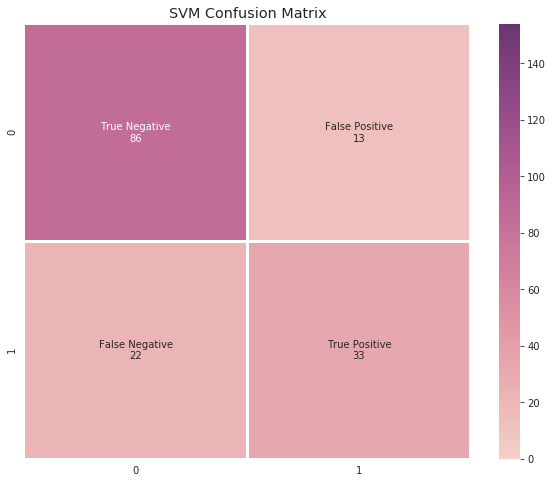

In [218]:
plot_confusion_matrix(cf_matrix_svm , y_test , 'SVM Confusion Matrix' , '2x2')

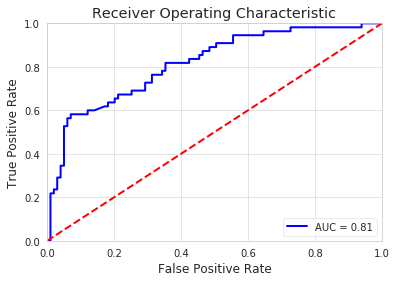

ROC AUC score is 0.81


In [219]:
plot_AUC_ROC_SVM_and_LG(X_test , y_test , y_prob_SVM)